# Tutorial 2a - Predicting Diabetes Progression with Linear Regression

In this tutorial, we will use linear regression to predict the progression of diabetes based on various health metrics. Learning objectives:
* Load and explore the diabetes dataset.
* Split the dataset into training and testing sets.
* Train a linear regression model.
* Evaluate the model's performance with regression metrics.

The dataset used in this tutorial is the diabetes dataset originally published by Efron et al. [1]. The dataset consists of data from 442 diabetes patients, including 10 baseline variables:

| Variable | Description |
|----------|----------------|
|age       | Age in years |
|sex       | Sex (1 = male, 2 = female) |
|bmi       | Body mass index |
|bp        | Average blood pressure |
|s1        | Total serum cholesterol |
|s2        | Low-density lipoproteins |
|s3        | High-density lipoproteins |
|s4        | Total cholesterol / HDL ratio |
|s5        | Log of serum triglycerides |
|s6        | Blood sugar level |
|target    | A quantitative measure of disease progression one year after baseline |


[1] [Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression" Annals of Statistics (with discussion), 407-499](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf).

# Data loading

Before we start, let's load the necessary libraries and the diabetes dataset:
* `numpy` for numerical operations
* `pandas` for data manipulation
* `matplotlib` for data visualization
* `sklearn` for machine learning tasks

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


CSV_DATA_PATH = 'https://raw.githubusercontent.com/pnhuy/pmlm/refs/heads/main/tutorial_2/diabetes_data_raw.csv'

For tabular data (csv or excel files), we typically use `pandas` to load and manipulate the data. This library provides multiple useful functions to read/write data files: `read_csv()`, `read_excel()`, `to_csv()`, `to_excel()`, etc.

After loading the data, we can use the `head()` function to display the first few rows of the dataset.

In [17]:
df = pd.read_csv(CSV_DATA_PATH, dtype={'sex': 'category'})
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151.0
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75.0
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141.0
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206.0
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135.0


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in understanding the dataset before applying any machine learning algorithms. In this section, we will perform univariate and bivariate analyses to gain insights into the data.

## Univariate Analysis

Univariate analysis involves examining each variable individually to understand its distribution, central tendency, and variability. We can use summary statistics and visualizations such as histograms and box plots to analyze each feature in the dataset.

The method `info()` provides a concise summary of the DataFrame, including the number of non-null entries and data types for each column.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     442 non-null    int64   
 1   sex     442 non-null    category
 2   bmi     442 non-null    float64 
 3   bp      442 non-null    float64 
 4   s1      442 non-null    int64   
 5   s2      442 non-null    float64 
 6   s3      442 non-null    float64 
 7   s4      442 non-null    float64 
 8   s5      442 non-null    float64 
 9   s6      442 non-null    int64   
 10  target  442 non-null    float64 
dtypes: category(1), float64(7), int64(3)
memory usage: 35.2 KB


The method `describe()` generates descriptive statistics that summarize the central tendency, variability, quartiles, and range of each numerical column.
Usually, we use `describe()` for numerical columns by default. To include categorical columns, we can specify the `include` parameter.

In [26]:
df.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [23]:
# describe() for categorical columns
df.describe(include=['category'])

,sex
count,442
unique,2
top,1
freq,235


One common visualization for univariate analysis is the histogram, which shows the distribution of a numerical variable. For example, we can plot the distribution of the `target` in the dataset.

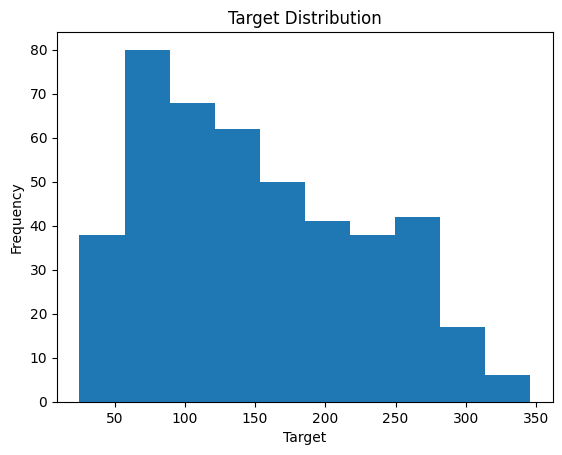

In [34]:
age = df['target']
plt.hist(age)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Box plots are another useful visualization for univariate analysis, as they display the distribution of numerical variables and highlight potential outliers. We can create box plots for all numerical columns in the dataset to examine their distributions.

Library `matplotlib.pyplot` provides method `boxplot()` to create box plots for visualizing the distribution of numerical variables. But here, we will use the built-in `boxplot()` method from the pandas DataFrame for simplicity.

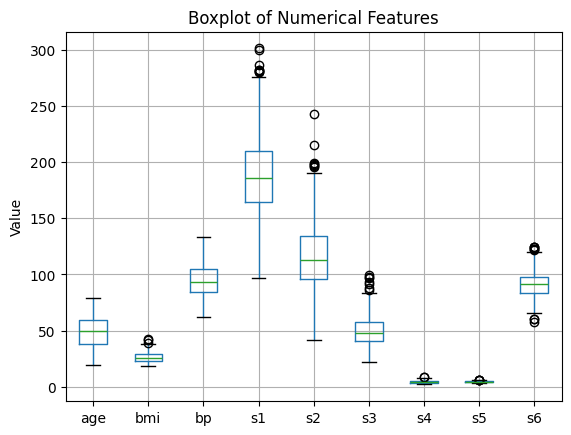

In [27]:
# boxplot for all numerical columns
df.boxplot(column=['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
plt.title('Boxplot of Numerical Features')
plt.ylabel('Value')
plt.show()

## Bivariate Analysis

Bivariate analysis involves examining the relationship between two variables. We can use scatter plots, correlation matrices, and grouped box plots to analyze the relationships between features in the dataset.

For example, we can create a scatter plot to visualize the relationship between `bmi` and `target`.

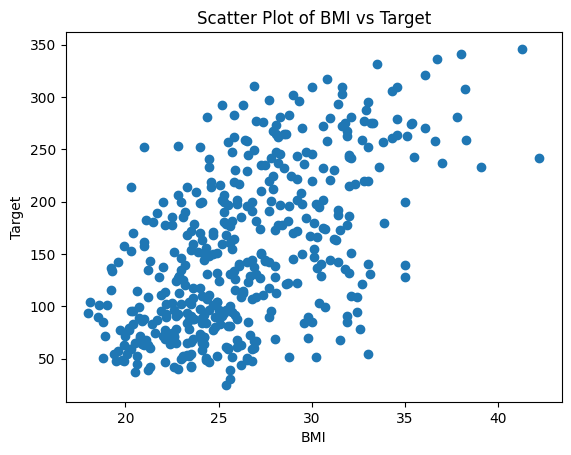

In [40]:
plt.scatter(df['bmi'], df['target'])
plt.title('Scatter Plot of BMI vs Target')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.show()

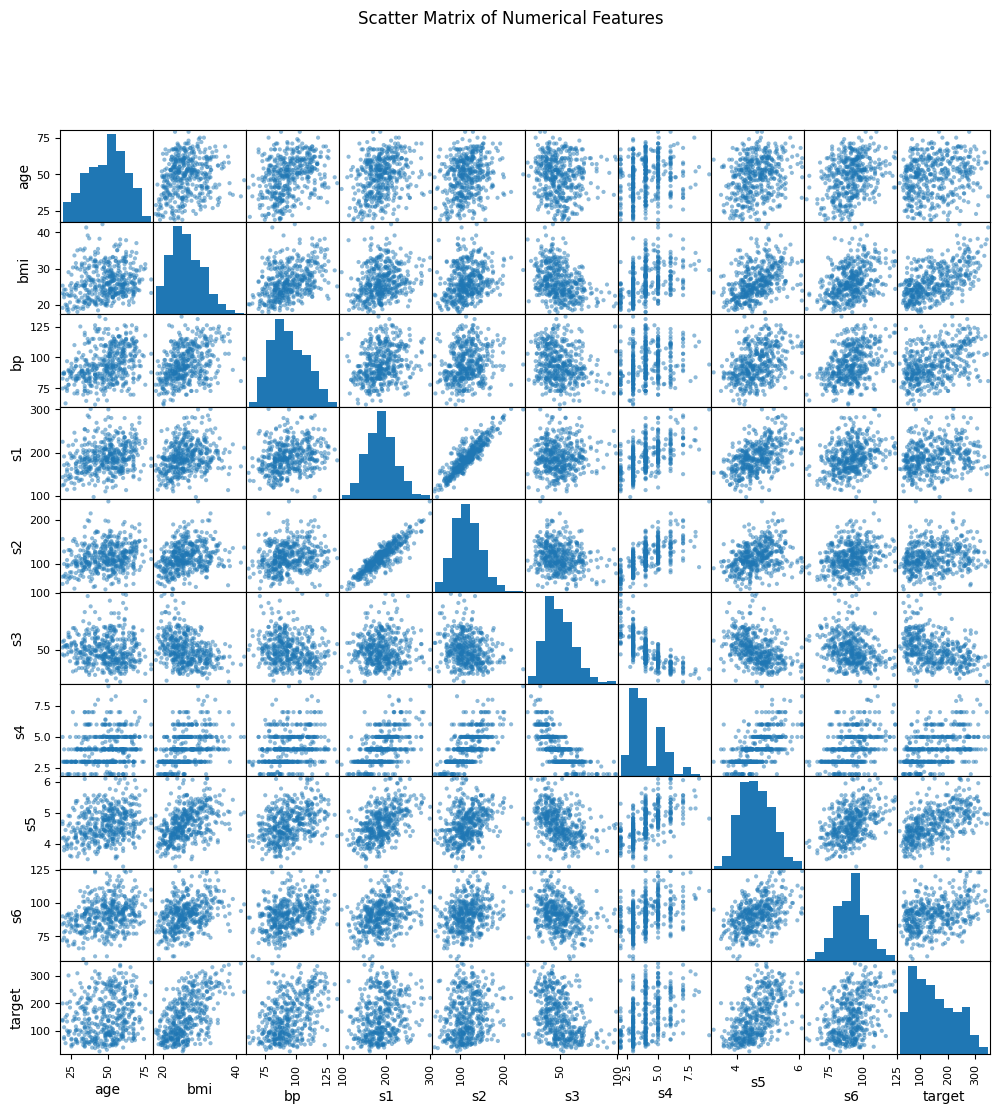

In [46]:
# scatter plot for numerical columns against each other
numerical_columns = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
df_numerical = df[numerical_columns]
pd.plotting.scatter_matrix(df_numerical, figsize=(12, 12))
plt.suptitle('Scatter Matrix of Numerical Features')
plt.show()

To measure the strength and direction of the linear relationship between numerical variables, we can compute the correlation matrix using the `corr()` method from the pandas DataFrame. A correlation matrix displays the pairwise correlation coefficients between all numerical variables in the dataset.

In [ ]:
# correlation coefficients between 'bmi' and 'target' with numpy
print("Correlation coefficient between 'bmi' and 'target' with numpy:")
print(np.corrcoef(df['bmi'], df['target']))

# or using pandas
print("Correlation coefficient between 'bmi' and 'target' with pandas:")
print(df[['bmi', 'target']].corr())

Correlation coefficient between 'bmi' and 'target' with numpy:
[[1.         0.58645013]
 [0.58645013 1.        ]]
Correlation coefficient between 'bmi' and 'target' with pandas:
            bmi   target
bmi     1.00000  0.58645
target  0.58645  1.00000


In [54]:
# Calculate correlation matrix for all numerical columns
correlation_matrix = df.corr(numeric_only=True)
print("Correlation matrix for all numerical columns:")
correlation_matrix.round(2)

Correlation matrix for all numerical columns:


,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
bmi,0.19,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38
target,0.19,0.59,0.44,0.21,0.17,-0.39,0.43,0.57,0.38,1.00


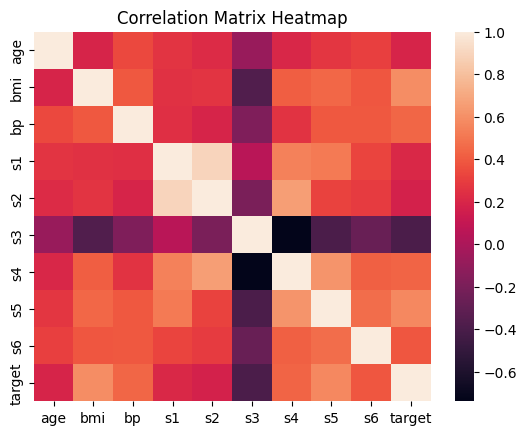

In [58]:
# correlation matrix heatmap
import seaborn as sns
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')
plt.show()

Sometimes, we may want to compare the distribution of a numerical variable across different categories of a categorical variable. For instance, we can compare the target distribution between male and female patients using histograms.

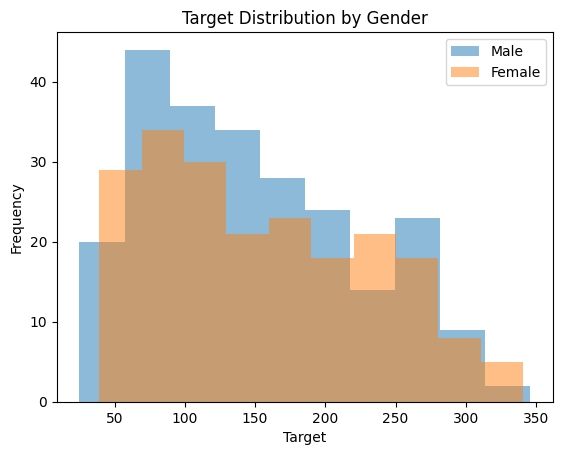

In [ ]:
# Histogram for target by sex
male_target = df[df['sex'] == '1']['target']
female_target = df[df['sex'] == '2']['target']
plt.hist(male_target, alpha=0.5, label='Male')
plt.hist(female_target, alpha=0.5, label='Female')
plt.title('Target Distribution by Gender')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend()
plt.show()

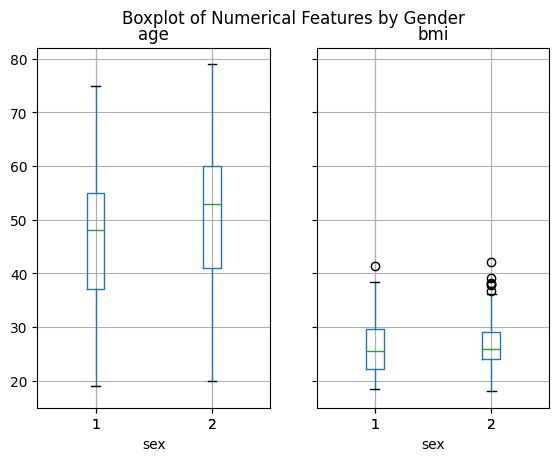

In [ ]:
df.boxplot(column=['age', 'bmi'], by='sex')
plt.suptitle('Boxplot of Numerical Features by Gender')
plt.ylabel('Value')
plt.show()

# Simple linear regression

In this section, we will implement a simple linear regression model to predict the `target` variable based on a single feature from the dataset. We will use the `LinearRegression` class from the `sklearn.linear_model` module to create and train our model.

We choose `bmi` - the most related feature to the target variable based on the correlation matrix. Then, we will split the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection` module.

The dataset is split into 80% training data and 20% testing data. The training set is used to fit the linear regression model, while the testing set is used to evaluate the model's performance.

In [81]:
x = np.array(df['bmi'])
y = np.array(df['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(353,)
(89,)


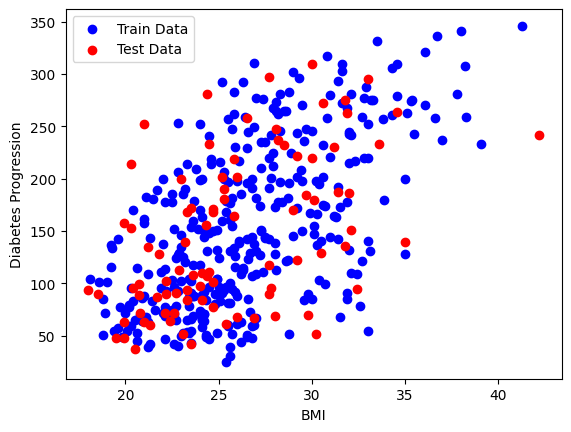

In [82]:
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_test, y_test, color='red', label='Test Data')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()

In [83]:
# Convert row vectors to column vectors
# to fit the sklearn model
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [85]:
linreg_model = LinearRegression()
linreg_model.fit(x_train, y_train)
y_train_pred = linreg_model.predict(x_train)
y_pred = linreg_model.predict(x_test)

# Print the coefficients
coef = linreg_model.coef_[0]
bias = linreg_model.intercept_
print('Coefficient (slope):', coef)
print('Intercept:', bias)

Coefficient (slope): 10.762790900604491
Intercept: -131.8737783609421


To evaluate the performance of our linear regression model, we will use several regression metrics:
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-squared (R^2)

In [86]:
print('Train metrics:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R^2:', r2_score(y_train, y_train_pred))

print('Test metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

Train metrics:
MAE: 51.37972765404719
MSE: 3854.11265207582
RMSE: 62.081500079136454
R^2: 0.3657241273794126
Test metrics:
MAE: 52.259976445345536
MSE: 4061.8259284949268
RMSE: 63.73245584860925
R^2: 0.23335039815872138


In this case, the test metrics are worse than the train metrics, indicating that the model may be overfitting the training data. The R^2 value of 0.23 on the test set suggests that the model explains only 23% of the variance in the target variable, which is relatively low.

We can construct a linear regression equation based on the coefficients obtained from the model to draw the regression line.

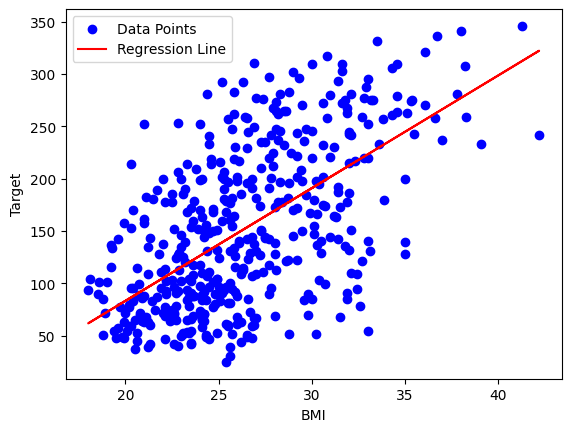

In [70]:
x = np.array(df['bmi'])
y = x * coef + bias
plt.scatter(df['bmi'], df['target'], color='blue', label='Data Points')
plt.plot(df['bmi'], y, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()

# Multi-variable linear regression

In this section, we will use all features in the dataset to predict the `target` variable using a multi-variable linear regression model.

In [76]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151.0
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75.0
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141.0
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206.0
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135.0


In [88]:
x = np.array(df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])
y = np.array(df['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [89]:
linreg_model = LinearRegression()
linreg_model.fit(x_train, y_train)
y_train_pred = linreg_model.predict(x_train)
y_pred = linreg_model.predict(x_test)

# Print the coefficients
coef = linreg_model.coef_
bias = linreg_model.intercept_
print('Coefficients:', coef)
print('Intercept:', bias)

Coefficients: [  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
   0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]
Intercept: -341.3782363335059


In [91]:
print('Train metrics:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R^2:', r2_score(y_train, y_train_pred))

print('Test metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))

Train metrics:
MAE: 43.4835035239804
MSE: 2868.549702835577
RMSE: 53.558843367230935
R^2: 0.5279193863361498
Test metrics:
MAE: 42.794094679599944
MSE: 2900.193628493484
RMSE: 53.85344583676595
R^2: 0.45260276297191904


After including all features in the model, all evaluation metrics (MAE, MSE, RMSE, R^2) improve significantly compared to the simple linear regression model.

Other questions to explore:
* Is this the best model we can get? Can we improve the performance further?
* How to interpret the coefficients of the linear regression model?
